In [339]:
# install.packages('readr')
library('igraph')
library('readr')

In [340]:
name_sector = "finance_data/Name_sector.csv"
sector = read.csv(name_sector,stringsAsFactors = FALSE)

In [341]:
stock_names = sector$Symbol
mat_r = matrix(list(),length(stock_names),2)
P.data <- data.frame(A = character(), B = character(),  C = numeric(), stringsAsFactors=FALSE) 
colnames(P.data) = c("Node_1", "Node_2", "weights")

In [342]:
P.data

Node_1 Node_2 weights

In [409]:
row_count = 0
for(i in stock_names) { 
  row_count = row_count + 1
  cat("Stock No:-" , row_count ,"\n")
  fname_co = paste('finance_data/data/',i,'.csv',sep = "") 
  data_close = read.csv(fname_co,stringsAsFactors = FALSE)$Close 
  r_local = numeric(0) 
  for (j in 2:length(data_close)){
    q=(data_close[j]-data_close[j-1])
    q=q/data_close[j-1]
    r_local[j-1] = log(1+q)
  }
  mat_r[[row_count,1]] = i
  mat_r[[row_count,2]] = r_local
}

Stock No:- 1 
Stock No:- 2 
Stock No:- 3 
Stock No:- 4 
Stock No:- 5 
Stock No:- 6 
Stock No:- 7 
Stock No:- 8 
Stock No:- 9 
Stock No:- 10 
Stock No:- 11 
Stock No:- 12 
Stock No:- 13 
Stock No:- 14 
Stock No:- 15 
Stock No:- 16 
Stock No:- 17 
Stock No:- 18 
Stock No:- 19 
Stock No:- 20 
Stock No:- 21 
Stock No:- 22 
Stock No:- 23 
Stock No:- 24 
Stock No:- 25 
Stock No:- 26 
Stock No:- 27 
Stock No:- 28 
Stock No:- 29 
Stock No:- 30 
Stock No:- 31 
Stock No:- 32 
Stock No:- 33 
Stock No:- 34 
Stock No:- 35 
Stock No:- 36 
Stock No:- 37 
Stock No:- 38 
Stock No:- 39 
Stock No:- 40 
Stock No:- 41 
Stock No:- 42 
Stock No:- 43 
Stock No:- 44 
Stock No:- 45 
Stock No:- 46 
Stock No:- 47 
Stock No:- 48 
Stock No:- 49 
Stock No:- 50 
Stock No:- 51 
Stock No:- 52 
Stock No:- 53 
Stock No:- 54 
Stock No:- 55 
Stock No:- 56 
Stock No:- 57 
Stock No:- 58 
Stock No:- 59 
Stock No:- 60 
Stock No:- 61 
Stock No:- 62 
Stock No:- 63 
Stock No:- 64 
Stock No:- 65 
Stock No:- 66 
Stock No:- 67 
Stoc

In [410]:
mat_r

[,1]
 [1,] A   
 [2,] AAL 
 [3,] AAP 
 [4,] AAPL
 [5,] ABBV
 [6,] ABC 
 [7,] ABT 
 [8,] ACN 
 [9,] ADBE
[10,] ADI 
[11,] ADM 
[12,] ADP 
[13,] ADS 
[14,] ADSK
[15,] AEE 
[16,] AEP 
[17,] AES 
[18,] AET 
[19,] AFL 
[20,] AGN 
[21,] AIG 
[22,] AIV 
[23,] AIZ 
[24,] AJG 
[25,] AKAM
[26,] ALB 
[27,] ALK 
[28,] ALL 
[29,] ALLE
[30,] ALXN
[31,] ⋮   
[32,] VZ  
[33,] WAT 
[34,] WBA 
[35,] WDC 
[36,] WEC 
[37,] WFC 
[38,] WFM 
[39,] WHR 
[40,] WLTW
[41,] WM  
[42,] WMB 
[43,] WMT 
[44,] WRK 
[45,] WU  
[46,] WY  
[47,] WYN 
[48,] WYNN
[49,] XEC 
[50,] XEL 
[51,] XL  
[52,] XLNX
[53,] XOM 
[54,] XRAY
[55,] XRX 
[56,] XYL 
[57,] YHOO
[58,] YUM 
[59,] ZBH 
[60,] ZION
[61,] ZTS 
      [,2]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [411]:
edge_count = 0
count = 1
all_w_ijs = numeric()
for( i in 1 : (length(stock_names)-1) ) {
  cat("Stock No:- ",count, "\n")
  count = count + 1
  for( j in (i+1) : length(stock_names) ){
    edge_count = edge_count + 1
    P_i = mat_r[[i,2]]
    P_j = mat_r[[j,2]]
    avg_i = mean(P_i) 
    avg_j = mean(P_j)
    avg2_i = mean(P_i^2) 
    avg2_j = mean(P_j^2)
    P_ij = (mean(P_i*P_j)  - avg_i * avg_j) / sqrt((avg2_i - avg_i^2) * (avg2_j - avg_j^2))
    w_ij = sqrt(2*(1-P_ij))
    all_w_ijs = c(all_w_ijs , w_ij)
    P.data[edge_count,1] = stock_names[i] 
    P.data[edge_count,2] = stock_names[j]
    P.data[edge_count,3] = w_ij
  }
}

Stock No:-  1 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  2 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  3 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  4 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  5 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  6 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  7 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  8 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  9 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  10 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  11 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  12 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  13 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  14 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  15 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  16 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  17 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  18 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  19 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  20 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  21 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  22 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  23 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  24 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  25 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  26 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  27 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  28 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  29 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  30 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  31 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  32 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  33 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  34 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  35 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  36 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  37 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  38 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  39 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  40 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  41 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  42 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  43 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  44 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  45 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  46 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  47 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  48 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  49 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  50 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  51 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  52 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  53 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  54 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  55 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  56 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  57 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  58 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  59 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  60 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  61 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  62 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  63 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  64 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  65 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  66 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  67 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  68 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  69 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  70 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  71 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  72 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  73 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  74 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  75 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  76 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  77 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  78 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  79 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  80 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  81 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  82 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  83 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  84 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  85 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  86 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  87 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  88 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  89 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  90 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  91 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  92 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  93 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  94 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  95 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  96 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  97 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  98 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  99 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  100 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  101 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  102 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  103 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  104 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  105 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  106 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  107 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  108 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  109 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  110 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  111 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  112 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  113 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  114 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  115 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  116 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  117 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  118 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  119 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  120 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  121 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  122 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  123 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  124 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  125 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  126 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  127 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  128 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  129 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  130 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  131 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  132 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  133 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  134 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  135 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  136 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  137 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  138 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  139 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  140 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  141 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  142 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  143 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  144 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  145 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  146 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  147 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  148 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  149 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  150 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  151 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  152 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  153 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  154 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  155 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  156 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  157 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  158 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  159 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  160 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  161 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  162 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  163 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  164 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  165 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  166 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  167 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  168 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  169 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  170 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  171 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  172 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  173 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  174 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  175 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  176 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  177 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  178 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  179 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  180 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  181 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  182 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  183 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  184 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  185 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  186 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  187 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  188 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  189 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  190 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  191 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  192 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  193 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  194 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  195 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  196 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  197 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  198 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  199 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  200 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  201 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  202 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  203 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  204 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  205 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  206 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  207 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  208 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  209 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  210 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  211 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  212 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  213 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  214 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  215 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  216 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  217 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  218 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  219 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  220 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  221 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  222 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  223 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  224 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  225 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  226 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  227 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  228 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  229 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  230 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  231 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  232 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  233 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  234 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  235 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  236 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  237 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  238 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  239 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  240 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  241 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  242 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  243 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  244 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  245 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  246 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  247 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  248 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  249 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  250 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  251 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  252 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  253 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  254 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  255 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  256 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  257 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  258 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  259 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  260 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  261 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  262 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  263 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  264 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  265 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  266 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  267 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  268 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  269 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  270 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  271 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  272 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  273 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  274 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  275 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  276 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  277 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  278 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  279 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  280 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  281 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  282 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  283 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  284 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  285 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  286 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  287 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  288 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  289 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  290 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  291 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  292 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  293 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  294 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  295 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  296 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  297 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  298 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  299 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  300 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  301 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  302 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  303 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  304 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  305 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  306 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  307 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  308 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  309 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  310 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  311 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  312 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  313 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  314 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  315 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  316 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  317 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  318 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  319 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  320 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  321 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  322 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  323 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  324 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  325 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  326 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  327 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  328 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  329 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  330 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  331 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  332 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  333 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  334 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  335 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  336 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  337 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  338 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  339 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  340 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  341 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  342 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  343 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  344 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  345 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  346 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  347 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  348 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  349 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  350 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  351 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  352 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  353 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  354 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  355 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  356 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  357 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  358 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  359 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  360 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  361 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  362 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  363 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  364 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  365 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  366 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  367 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  368 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  369 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  370 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  371 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  372 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  373 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  374 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  375 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  376 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  377 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  378 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  379 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  380 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  381 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  382 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  383 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  384 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  385 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  386 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  387 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  388 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  389 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  390 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  391 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  392 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  393 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  394 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  395 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  396 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  397 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  398 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  399 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  400 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  401 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  402 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  403 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  404 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  405 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  406 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  407 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  408 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  409 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  410 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  411 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  412 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  413 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  414 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  415 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  416 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  417 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  418 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  419 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  420 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  421 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  422 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  423 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  424 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  425 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  426 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  427 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  428 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  429 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  430 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  431 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  432 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  433 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  434 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  435 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  436 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  437 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  438 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  439 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  440 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  441 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  442 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  443 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  444 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  445 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  446 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  447 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  448 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  449 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  450 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  451 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  452 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  453 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  454 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  455 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  456 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  457 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  458 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  459 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  460 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  461 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  462 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  463 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  464 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  465 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  466 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  467 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  468 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  469 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  470 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  471 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  472 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  473 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  474 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  475 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  476 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  477 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  478 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  479 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  480 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  481 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  482 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  483 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  484 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  485 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  486 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  487 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  488 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  489 
Stock No:-  490 
Stock No:-  491 
Stock No:-  492 
Stock No:-  493 
Stock No:-  494 
Stock No:-  495 
Stock No:-  496 
Stock No:-  497 
Stock No:-  498 
Stock No:-  499 
Stock No:-  500 
Stock No:-  501 
Stock No:-  502 
Stock No:-  503 
Stock No:-  504 


[1] 0.01590102

[1] 1.200126

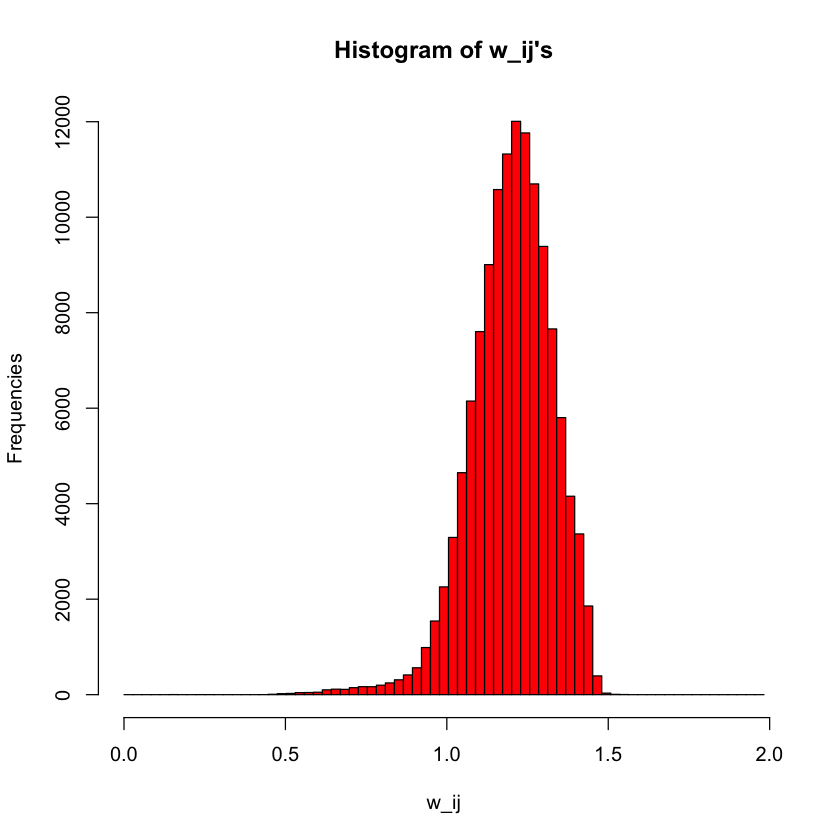

In [412]:
g1 = graph.data.frame(P.data,directed = FALSE)
var(all_w_ijs)
mean(all_w_ijs)
hist( x= all_w_ijs, col = "red", breaks = seq(from = round(min(all_w_ijs)), to = round(max(all_w_ijs)), by = (max(all_w_ijs)-min(all_w_ijs))/50), 
      main = "Histogram of w_ij's", xlab = "w_ij", ylab = "Frequencies")

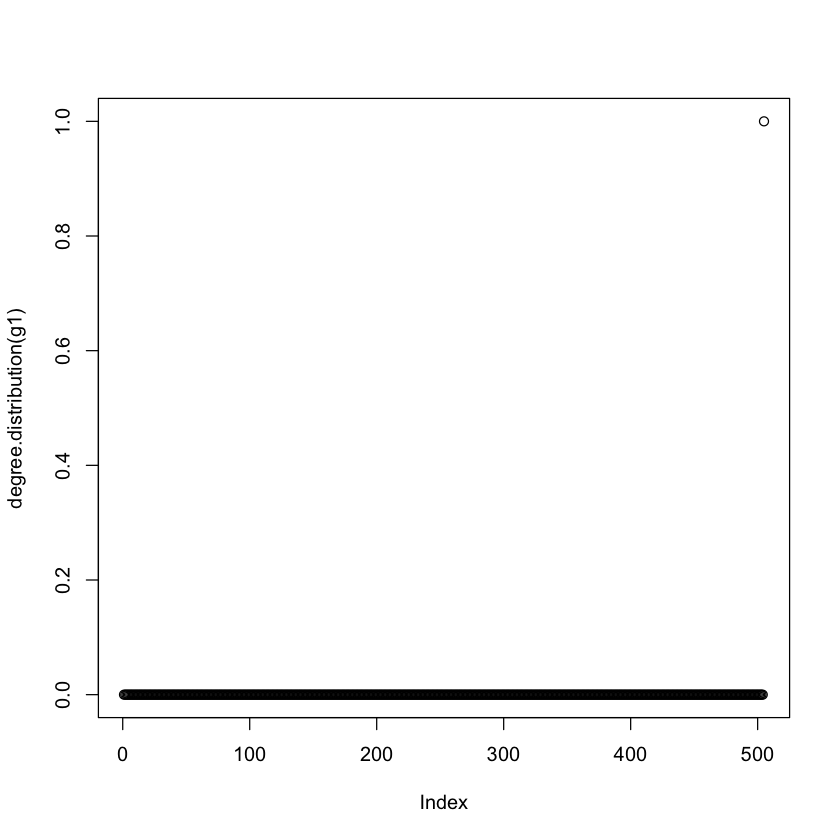

In [413]:
plot(degree.distribution(g1))

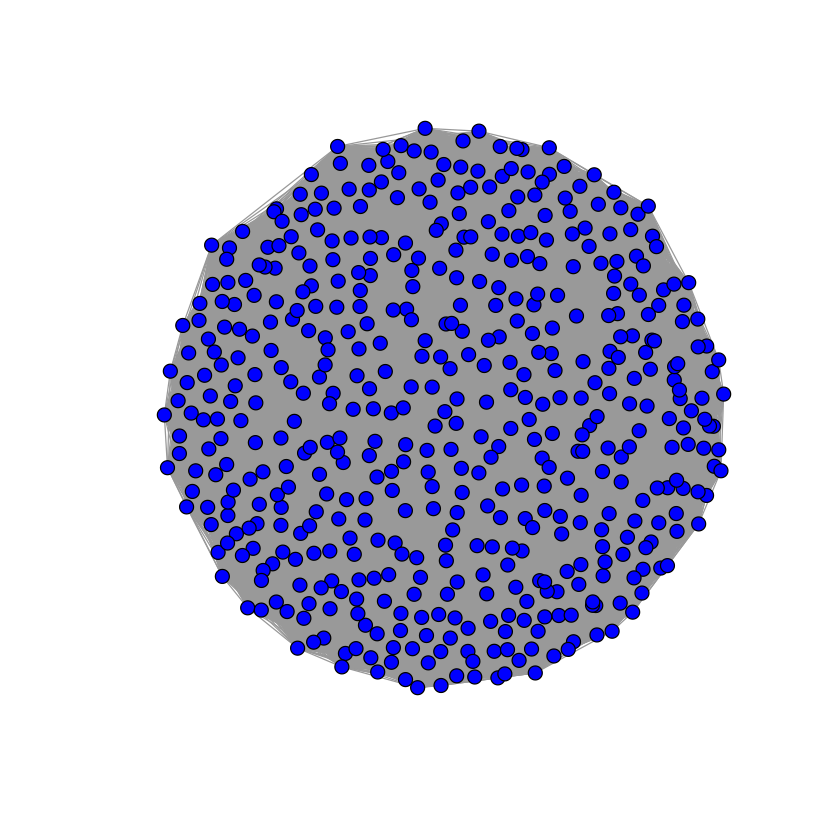

In [414]:
plot(g1,vertex.size = 5,vertex.color = "blue",vertex.label = NA)

## Q 3

In [415]:
g1_mst <- mst(g1, E(g1)$weights)

In [416]:
plot(g1_mst, vertex.size = 5,vertex.label.font=2,vertex.label.cex=.2)

In [417]:
g1_mst

V(g1_mst)$color <- sector$Sector[V(g1_mst)]
vcount(g1_mst)
ecount(g1_mst)

IGRAPH df49bc4 UN-- 505 504 -- 
+ attr: name (v/c), weights (e/n)
+ edges from df49bc4 (vertex names):
 [1] A   --TMO   AAL --DAL   AAP --ORLY  AAPL--UNP   ABBV--AMGN  ABC --CAH  
 [7] ABT --HOLX  ABT --MDT   ABT --TMO   ABT --VAR   ACN --CTSH  ACN --FISV 
[13] ACN --ORCL  ACN --RHT   ADBE--CRM   ADBE--INTU  ADI --TXN   ADI --XLNX 
[19] ADM --PFG   ADP --PAYX  ADS --DFS   ADSK--MCO   AEE --XEL   AEP --DUK  
[25] AEP --ETR   AEP --FE    AEP --PPL   AEP --XEL   AES --CNP   AES --NRG  
[31] AET --ANTM  AET --CNC   AET --HUM   AET --UNH   AFL --PRU   AGN --AMGN 
[37] AGN --MYL   AIG --JPM   AIV --REG   AIV --UDR   AIZ --BRK.B AIZ --HRL  
[43] AJG --MMC   AKAM--TEL   ALB --EMN   ALK --DAL   ALL --CINF  ALLE--AYI  
+ ... omitted several edges

[1] 505

[1] 504

In [422]:
pal <- c(rainbow(n = length(unique(sector$Sector))))
sec_list = c(unique(sector$Sector))
pal <- c('Health Care' = '#FF0000FF', 'Industrials' = '#FF8B00FF', 'Consumer Discretionary'='#E8FF00FF', 'Information Technology'= '#5DFF00FF', 'Consumer Staples' = '#00FF2EFF', 'Utilities' = '#00FFB9FF', 'Financials' = '#00B9FFFF', 'Real Estate' = '#002EFFFF', 'Materials' = '#5D00FFFF', 'Energy' = '#E800FFFF',  'Telecommunication Services' = '#FF008BFF')


# V(g1_mst)$color <- pal[sec_list==sector$Sector[V(g1_mst)]]
plot(g1_mst,vertex.size = 4, vertex.color = pal[sector$Sector[V(g1_mst)]],  vertex.label = NA)
legend('topleft', legend=sec_list, col=pal_l, bty='n', cex=0.75, lty=1)
# plot(g1_mst,vertex.size = 5, vertex.label = NA)

## Q 5

In [423]:

fname_co = paste('finance_data/data/', stock_names[65],'.csv',sep = "") 
print(fname_co)
df = read.table(fname_co, sep=',', header = T)

df$Day = weekdays(as.Date(df$Date, format = "%Y-%m-%d"))
day_list = c(df$Day)
t = c()                          
# for(i in 1:nrow(df)){
# #     if(df[i]$Day == NA){
# #         df[i]$Day = weekdays(as.Date(df$Date, format = "%m/%d/%y"))
# #     }
#     if(df[i, ]$Day == "Monday")
#         t = c(t, TRUE)
#     else
#         t = c(t, FALSE)
# #     print(df[i, ]$Day)
# }

# print(df[t, ])
df

[1] "finance_data/data/BF.B.csv"


Date    Open   High   Low    Close Volume  Adj.Close Day
1   5/1/14  44.760 45.055 44.485 89.84  506000 44.920    NA 
2   5/2/14  44.825 45.315 44.710 90.56  705000 45.280    NA 
3   5/5/14  45.220 45.700 44.960 91.20  789600 45.600    NA 
4   5/6/14  45.355 45.465 44.815 89.78 1085600 44.890    NA 
5   5/7/14  44.955 45.380 44.925 90.63  577600 45.315    NA 
6   5/8/14  45.265 45.525 44.965 90.17  441800 45.085    NA 
7   5/9/14  45.000 45.270 44.800 90.46  548000 45.230    NA 
8   5/12/14 45.395 45.630 45.160 90.57  628000 45.285    NA 
9   5/13/14 45.285 45.530 45.220 90.88  658000 45.440    NA 
10  5/14/14 45.500 45.805 45.380 91.35  759800 45.675    NA 
11  5/15/14 45.530 45.695 45.055 90.41  660800 45.205    NA 
12  5/16/14 45.195 46.135 45.170 92.14  630200 46.070    NA 
13  5/19/14 46.020 46.125 45.730 91.53  483000 45.765    NA 
14  5/20/14 45.765 45.915 45.145 90.39  618800 45.195    NA 
15  5/21/14 45.270 45.810 45.195 91.50  600600 45.750    NA 
16  5/22/14 45.745 46.235 45.495 91.88  567200 45.940    NA 
17  5/23/14 46.025 46.025 45.495 91.42  502600 45.710    NA 
18  5/27/14 45.640 46.120 45.640 92.01  401000 46.005    NA 
19  5/28/14 46.105 46.110 45.620 91.30  488800 45.650    NA 
20  5/29/14 45.690 46.270 45.690 92.28  433000 46.140    NA 
21  5/30/14 46.135 46.400 46.045 92.67  777800 46.335    NA 
22  6/2/14  46.715 47.385 46.215 93.59  889000 46.795    NA 
23  6/3/14  46.910 47.010 46.360 92.90 1333600 46.450    NA 
24  6/4/14  46.460 46.660 46.045 93.15 1163400 46.575    NA 
25  6/5/14  46.575 47.370 46.100 94.67  971800 47.335    NA 
26  6/6/14  47.365 47.430 46.905 94.49  868000 47.245    NA 
27  6/9/14  47.090 47.370 46.565 93.37  963600 46.685    NA 
28  6/10/14 46.550 46.980 46.535 93.68  927400 46.840    NA 
29  6/11/14 46.915 47.110 46.710 93.92  491800 46.960    NA 
30  6/12/14 46.915 47.245 46.680 93.84  510200 46.920    NA 
⋮   ⋮       ⋮      ⋮      ⋮      ⋮     ⋮       ⋮         ⋮  
736 3/31/17 46.42  46.57  46.16  46.18 1019900 46.18     NA 
737 4/3/17  46.23  46.56  45.78  45.88 1133100 45.88     NA 
738 4/4/17  45.92  45.97  45.61  45.82  742200 45.82     NA 
739 4/5/17  45.91  46.12  45.59  45.70  855000 45.70     NA 
740 4/6/17  45.67  45.98  45.58  45.66  716400 45.66     NA 
741 4/7/17  45.51  45.85  45.42  45.67  790300 45.67     NA 
742 4/10/17 45.81  46.11  45.60  45.98  710100 45.98     NA 
743 4/11/17 45.77  46.06  45.70  45.95  669900 45.95     NA 
744 4/12/17 45.87  46.24  45.82  45.95  413300 45.95     NA 
745 4/13/17 45.87  45.87  45.47  45.47  527100 45.47     NA 
746 4/17/17 45.64  45.94  45.53  45.93  479900 45.93     NA 
747 4/18/17 45.92  46.50  45.92  46.28  677000 46.28     NA 
748 4/19/17 46.21  46.59  46.16  46.23  630800 46.23     NA 
749 4/20/17 46.29  46.32  46.02  46.12  652800 46.12     NA 
750 4/21/17 45.97  46.30  45.92  46.26  530800 46.26     NA 
751 4/24/17 46.69  46.99  46.56  46.94  717400 46.94     NA 
752 4/25/17 46.80  47.42  46.80  47.32  799500 47.32     NA 
753 4/26/17 47.40  47.48  46.70  46.76  817100 46.76     NA 
754 4/27/17 47.03  47.10  46.69  46.78  573800 46.78     NA 
755 4/28/17 46.74  47.39  46.63  47.32  899300 47.32     NA 
756 5/1/17  47.30  47.48  47.05  47.36  602600 47.36     NA 
757 5/2/17  47.51  47.55  47.35  47.50  479500 47.50     NA 
758 5/3/17  47.50  47.70  47.26  47.39  535100 47.39     NA 
759 5/4/17  47.67  48.44  47.45  48.40  923300 48.40     NA 
760 5/5/17  48.51  49.01  48.47  49.01  969000 49.01     NA 
761 5/8/17  48.99  49.41  48.71  49.39 1090400 49.39     NA 
762 5/9/17  49.40  49.58  49.26  49.41 1021800 49.41     NA 
763 5/10/17 49.47  49.49  49.15  49.25  683300 49.25     NA 
764 5/11/17 49.15  49.62  48.84  49.61  717800 49.61     NA 
765 5/12/17 49.53  49.53  49.16  49.20  542400 49.20     NA

In [425]:
row_count = 0
for(i in stock_names) { 
  row_count = row_count + 1
  cat("Stock No:-" , row_count ,"\n")
  fname_co = paste('finance_data/data/',i,'.csv',sep = "") 
  df = read.csv(fname_co,stringsAsFactors = FALSE) 
    if(i == 'BF.B' || i == "BRK.B"){
    print('yes')
      df$Day = weekdays(as.Date(df$Date, format = "%m/%d/%y"))}
    else
      df$Day = weekdays(as.Date(df$Date, format = "%Y-%m-%d"))

    t = c()                          
    for(j in 1:nrow(df)){
        if(df[j, ]$Day == "Monday")
            t = c(t, TRUE)
        else
            t = c(t, FALSE)
    }
    
    data_close = df[t, ]$Close

  r_local = numeric(0) 
  for (j in 2:length(data_close)){
    q=(data_close[j]-data_close[j-1])
    q=q/data_close[j-1]
    r_local[j-1] = log(1+q)
  }
  mat_r[[row_count,1]] = i
  mat_r[[row_count,2]] = r_local
}

Stock No:- 1 
Stock No:- 2 
Stock No:- 3 
Stock No:- 4 
Stock No:- 5 
Stock No:- 6 
Stock No:- 7 
Stock No:- 8 
Stock No:- 9 
Stock No:- 10 
Stock No:- 11 
Stock No:- 12 
Stock No:- 13 
Stock No:- 14 
Stock No:- 15 
Stock No:- 16 
Stock No:- 17 
Stock No:- 18 
Stock No:- 19 
Stock No:- 20 
Stock No:- 21 
Stock No:- 22 
Stock No:- 23 
Stock No:- 24 
Stock No:- 25 
Stock No:- 26 
Stock No:- 27 
Stock No:- 28 
Stock No:- 29 
Stock No:- 30 
Stock No:- 31 
Stock No:- 32 
Stock No:- 33 
Stock No:- 34 
Stock No:- 35 
Stock No:- 36 
Stock No:- 37 
Stock No:- 38 
Stock No:- 39 
Stock No:- 40 
Stock No:- 41 
Stock No:- 42 
Stock No:- 43 
Stock No:- 44 
Stock No:- 45 
Stock No:- 46 
Stock No:- 47 
Stock No:- 48 
Stock No:- 49 
Stock No:- 50 
Stock No:- 51 
Stock No:- 52 
Stock No:- 53 
Stock No:- 54 
Stock No:- 55 
Stock No:- 56 
Stock No:- 57 
Stock No:- 58 
Stock No:- 59 
Stock No:- 60 
Stock No:- 61 
Stock No:- 62 
Stock No:- 63 
Stock No:- 64 
Stock No:- 65 
[1] "yes"
Stock No:- 66 
Stock No:

In [426]:
mat_r

[,1]
 [1,] A   
 [2,] AAL 
 [3,] AAP 
 [4,] AAPL
 [5,] ABBV
 [6,] ABC 
 [7,] ABT 
 [8,] ACN 
 [9,] ADBE
[10,] ADI 
[11,] ADM 
[12,] ADP 
[13,] ADS 
[14,] ADSK
[15,] AEE 
[16,] AEP 
[17,] AES 
[18,] AET 
[19,] AFL 
[20,] AGN 
[21,] AIG 
[22,] AIV 
[23,] AIZ 
[24,] AJG 
[25,] AKAM
[26,] ALB 
[27,] ALK 
[28,] ALL 
[29,] ALLE
[30,] ALXN
[31,] ⋮   
[32,] VZ  
[33,] WAT 
[34,] WBA 
[35,] WDC 
[36,] WEC 
[37,] WFC 
[38,] WFM 
[39,] WHR 
[40,] WLTW
[41,] WM  
[42,] WMB 
[43,] WMT 
[44,] WRK 
[45,] WU  
[46,] WY  
[47,] WYN 
[48,] WYNN
[49,] XEC 
[50,] XEL 
[51,] XL  
[52,] XLNX
[53,] XOM 
[54,] XRAY
[55,] XRX 
[56,] XYL 
[57,] YHOO
[58,] YUM 
[59,] ZBH 
[60,] ZION
[61,] ZTS 
      [,2]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [1,] 0.0193312263, -0.0258589013, 0.0343319793, 0.0411524535, -0.0163268927, -0.0036073387, -0.0115968237, 0.0117688963, -0.0226214971, -0.0019377792, -0.0074336802, -0.0005330609, -0.0190209034, 0.0584056068, -0.0134183504, -0.0015598928, 0.0046724321, -0.0064086130, -0.0069746926, -0.0102005982, -0.0691570861, -0.0083698418, 0.0308469636, -0.2791368695, 0.0167540403, -0.0070073259, 0.0241956462, -0.0157446000, -0.0019254399, -0.0706116433, 0.0794857393, -0.0132197330, -0.0377217897, 0.0077588175, -0.0242252312, -0.0118193307, 0.0090056443, 0.0666335074, 0.0229786491, -0.0227389941, 0.0016756197, 0.0092846755, -0.0114395906, 0.0050209071, 0.0261283779, 0.0034790247, -0.0284156494, -0.0009533128, 0.0160836016, 0.0002346510, -0.0409393620, -0.0239901950, -0.0108218244, 0.0073112893, -0.0272454525, 0.0158773880, 0.0151288312, 0.0024994264, -0.0112967183, 0.0344904298, -0.0130110831, -0.0416254059, -0.1127724258, 0.0459300611, -0.0211530848, 0.0039303814, -0.0672132467, 0.0573582041, 0.0182257108, 0.0066463272, 0.0164252799, 0.0466803908, -0.0175145509, -0.0156812781, 0.0698318015, 0.0437455460, -0.0271465770, -0.0111181132, 0.0143071505, 0.0230005779, -0.0264353948, -0.0699763993, -0.0087359391, 0.0021247817, -0.0797774227, 0.088757937

In [427]:
edge_count = 0
count = 1
all_w_ijs = numeric()
for( i in 1 : (length(stock_names)-1) ) {
  cat("Stock No:- ",count, "\n")
  count = count + 1
  for( j in (i+1) : length(stock_names) ){
    edge_count = edge_count + 1
    P_i = mat_r[[i,2]]
    P_j = mat_r[[j,2]]
    avg_i = mean(P_i) 
    avg_j = mean(P_j)
    avg2_i = mean(P_i^2) 
    avg2_j = mean(P_j^2)
    P_ij = (mean(P_i*P_j)  - avg_i * avg_j) / sqrt((avg2_i - avg_i^2) * (avg2_j - avg_j^2))
    w_ij = sqrt(2*(1-P_ij))
    all_w_ijs = c(all_w_ijs , w_ij)
    P.data[edge_count,1] = stock_names[i] 
    P.data[edge_count,2] = stock_names[j]
    P.data[edge_count,3] = w_ij
  }
}

Stock No:-  1 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  2 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  3 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  4 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  5 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  6 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  7 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  8 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  9 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  10 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  11 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  12 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  13 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  14 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  15 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  16 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  17 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  18 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  19 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  20 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  21 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  22 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  23 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  24 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  25 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  26 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  27 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  28 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  29 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  30 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  31 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  32 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  33 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  34 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  35 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  36 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  37 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  38 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  39 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  40 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  41 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  42 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  43 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  44 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  45 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  46 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  47 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  48 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  49 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  50 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  51 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  52 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  53 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  54 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  55 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  56 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  57 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  58 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  59 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  60 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  61 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  62 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  63 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  64 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  65 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  66 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  67 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  68 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  69 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  70 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  71 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  72 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  73 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  74 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  75 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  76 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  77 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  78 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  79 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  80 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  81 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  82 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  83 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  84 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  85 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  86 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  87 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  88 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  89 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  90 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  91 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  92 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  93 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  94 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  95 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  96 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  97 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  98 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  99 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  100 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  101 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  102 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  103 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  104 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  105 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  106 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  107 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  108 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  109 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  110 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  111 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  112 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  113 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  114 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  115 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  116 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  117 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  118 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  119 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  120 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  121 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  122 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  123 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  124 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  125 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  126 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  127 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  128 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  129 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  130 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  131 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  132 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  133 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  134 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  135 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  136 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  137 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  138 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  139 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  140 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  141 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  142 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  143 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  144 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  145 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  146 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  147 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  148 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  149 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  150 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  151 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  152 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  153 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  154 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  155 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  156 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  157 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  158 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  159 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  160 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  161 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  162 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  163 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  164 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  165 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  166 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  167 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  168 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  169 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  170 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  171 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  172 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  173 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  174 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  175 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  176 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  177 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  178 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  179 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  180 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  181 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  182 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  183 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  184 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  185 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  186 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  187 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  188 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  189 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  190 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  191 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  192 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  193 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  194 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  195 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  196 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  197 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  198 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  199 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  200 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  201 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  202 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  203 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  204 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  205 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  206 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  207 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  208 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  209 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  210 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  211 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  212 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  213 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  214 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  215 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  216 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  217 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  218 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  219 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  220 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  221 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  222 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  223 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  224 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  225 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  226 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  227 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  228 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  229 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  230 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  231 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  232 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  233 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  234 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  235 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  236 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  237 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  238 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  239 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  240 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  241 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  242 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  243 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  244 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  245 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  246 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  247 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  248 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  249 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  250 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  251 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  252 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  253 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  254 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  255 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  256 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  257 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  258 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  259 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  260 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  261 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  262 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  263 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  264 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  265 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  266 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  267 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  268 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  269 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  270 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  271 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  272 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  273 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  274 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  275 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  276 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  277 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  278 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  279 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  280 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  281 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  282 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  283 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  284 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  285 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  286 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  287 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  288 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  289 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  290 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  291 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  292 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  293 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  294 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  295 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  296 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  297 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  298 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  299 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  300 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  301 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  302 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  303 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  304 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  305 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  306 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  307 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  308 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  309 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  310 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  311 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  312 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  313 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  314 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  315 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  316 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  317 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  318 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  319 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  320 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  321 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  322 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  323 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  324 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  325 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  326 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  327 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  328 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  329 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  330 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  331 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  332 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  333 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  334 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  335 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  336 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  337 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  338 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  339 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  340 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  341 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  342 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  343 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  344 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  345 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  346 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  347 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  348 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  349 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  350 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  351 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  352 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  353 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  354 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  355 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  356 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  357 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  358 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  359 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  360 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  361 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  362 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  363 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  364 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  365 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  366 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  367 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  368 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  369 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  370 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  371 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  372 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  373 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  374 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  375 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  376 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  377 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  378 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  379 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  380 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  381 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  382 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  383 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  384 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  385 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter

Stock No:-  386 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  387 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  388 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  389 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  390 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  391 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  392 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  393 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  394 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  395 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  396 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  397 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  398 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  399 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  400 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  401 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  402 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  403 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  404 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  405 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  406 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  407 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  408 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  409 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  410 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  411 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  412 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  413 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  414 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  415 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  416 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  417 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  418 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  419 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  420 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  421 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  422 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  423 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  424 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  425 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  426 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  427 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  428 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  429 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  430 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  431 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  432 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  433 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  434 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  435 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  436 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  437 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  438 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  439 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  440 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  441 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  442 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  443 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  444 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  445 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  446 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  447 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  448 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  449 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  450 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  451 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  452 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  453 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  454 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  455 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  456 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  457 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  458 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  459 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  460 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  461 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  462 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  463 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  464 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  465 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  466 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  467 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  468 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  469 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  470 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  471 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  472 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  473 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  474 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  475 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  476 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  477 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  478 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  479 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  480 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  481 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  482 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  483 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  484 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  485 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  486 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  487 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”

Stock No:-  488 


Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object length is not a multiple of shorter object length”Warning message in P_i * P_j:
“longer object lengt

Stock No:-  489 
Stock No:-  490 
Stock No:-  491 
Stock No:-  492 
Stock No:-  493 
Stock No:-  494 
Stock No:-  495 
Stock No:-  496 
Stock No:-  497 
Stock No:-  498 
Stock No:-  499 
Stock No:-  500 
Stock No:-  501 
Stock No:-  502 
Stock No:-  503 
Stock No:-  504 


[1] 0.02302677

[1] 1.169797

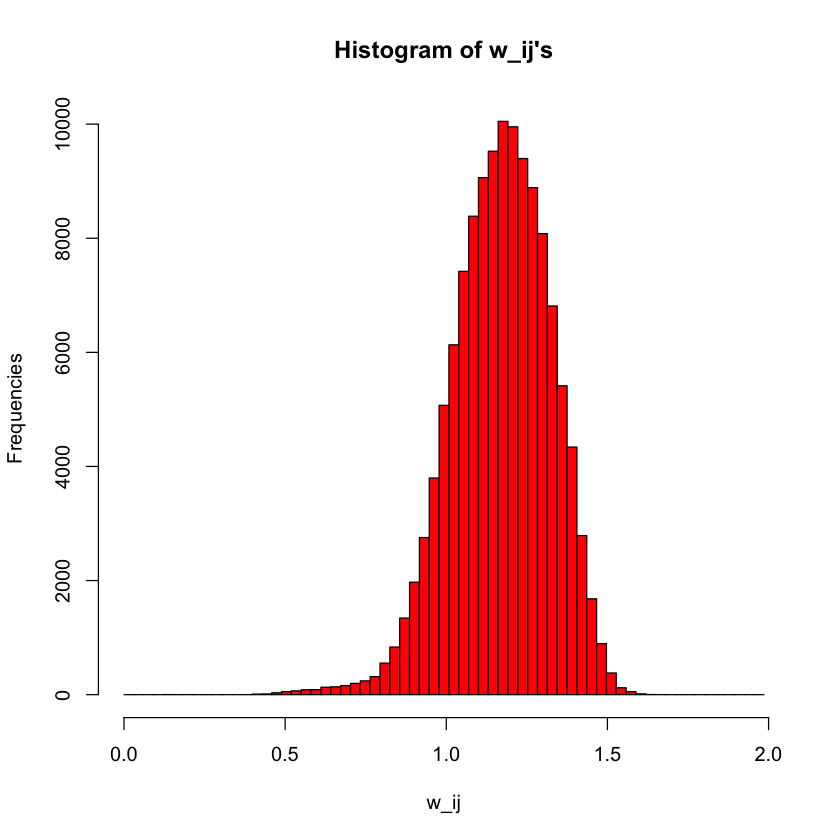

In [428]:
g2 = graph.data.frame(P.data,directed = FALSE)
var(all_w_ijs)
mean(all_w_ijs)
hist( x= all_w_ijs, col = "red", breaks = seq(from = round(min(all_w_ijs)), to = round(max(all_w_ijs)), by = (max(all_w_ijs)-min(all_w_ijs))/50), 
      main = "Histogram of w_ij's", xlab = "w_ij", ylab = "Frequencies")

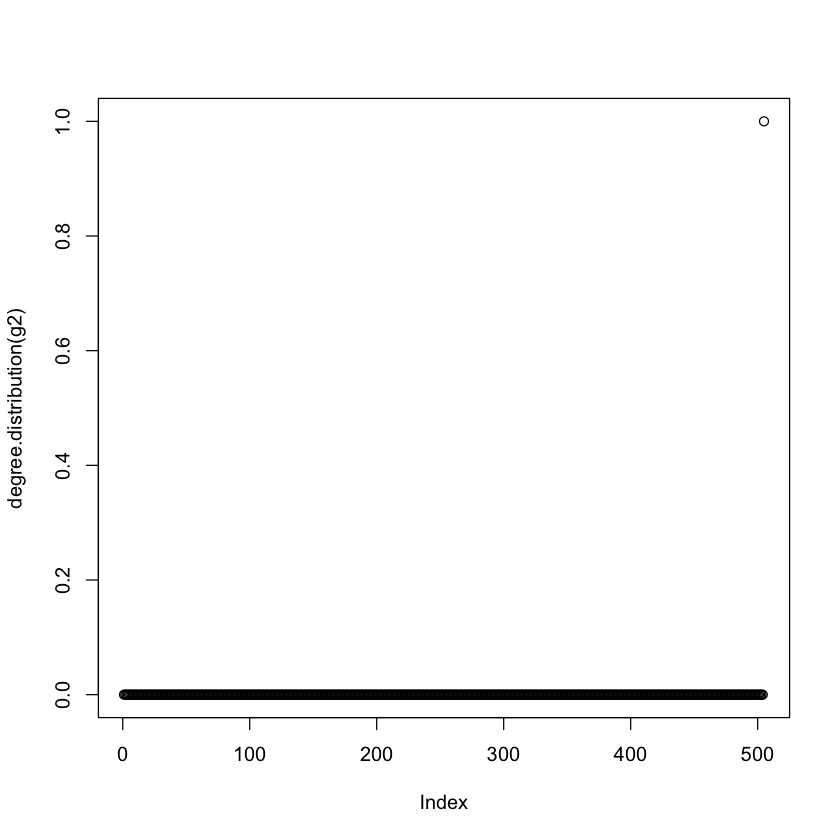

In [429]:
plot(degree.distribution(g2))

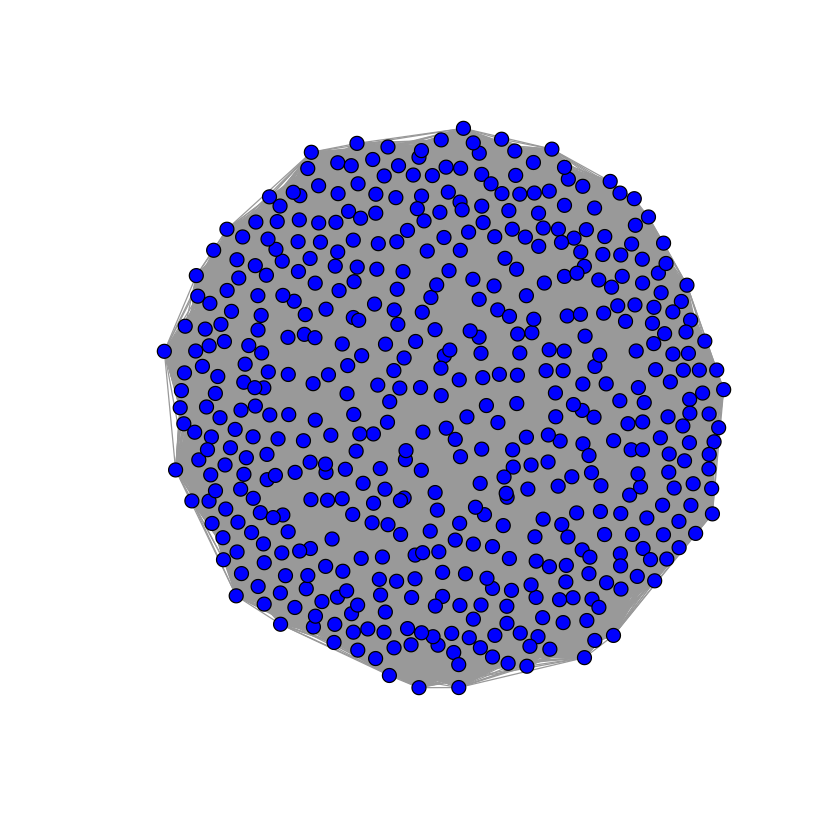

In [430]:
plot(g2,vertex.size = 5,vertex.color = "blue",vertex.label = NA)

In [431]:
g2_mst <- mst(g2, E(g2)$weights)

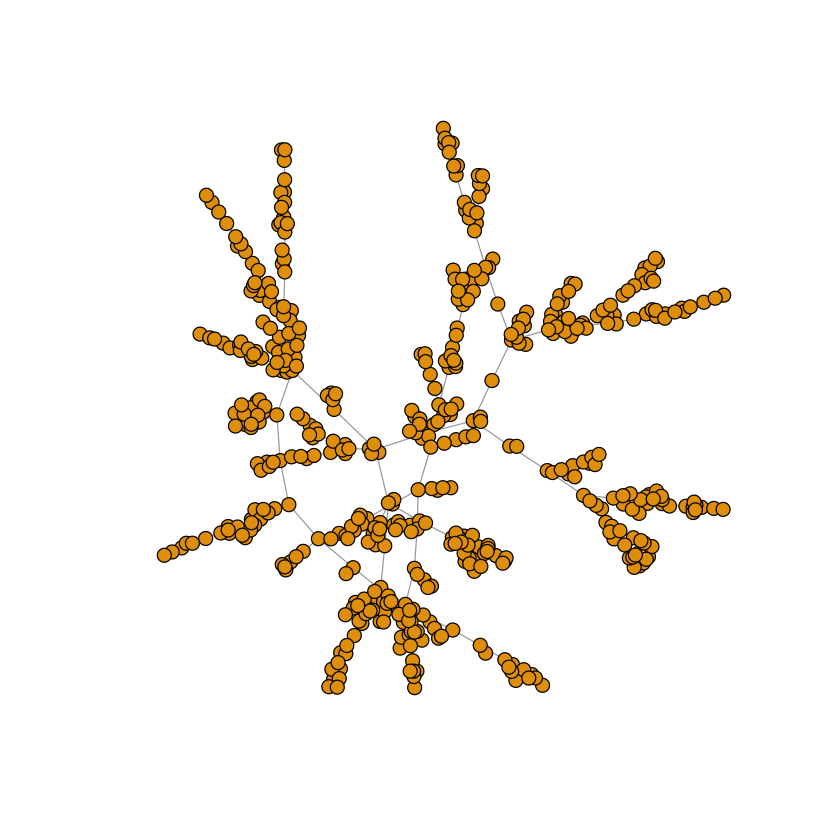

In [432]:
plot(g2_mst, vertex.size = 5, vertex.label = NA)

In [433]:
g2_mst

V(g2_mst)$color <- sector$Sector[V(g2_mst)]
vcount(g2_mst)
ecount(g2_mst)

IGRAPH 60ad5f5 UN-- 505 504 -- 
+ attr: name (v/c), weights (e/n)
+ edges from 60ad5f5 (vertex names):
 [1] A   --TMO  AAL --DAL  AAL --IPG  AAL --UAL  AAP --AZO  AAPL--UNP 
 [7] ABBV--AMGN ABBV--MYL  ABC --CAH  ABT --AMGN ABT --HOLX ABT --TMO 
[13] ACN --CTSH ACN --FISV ACN --MCD  ACN --RHT  ADBE--AMZN ADBE--CCL 
[19] ADBE--CRM  ADBE--EFX  ADBE--EQIX ADBE--MA   ADI --TXN  ADM --PFG 
[25] ADP --PAYX ADS --DAL  ADSK--CFG  ADSK--CSCO ADSK--KHC  AEE --XEL 
[31] AEP --AWK  AEP --ETR  AEP --FE   AEP --O    AEP --PCG  AEP --PEG 
[37] AEP --SO   AEP --XEL  AES --CNP  AET --CI   AET --HUM  AET --UNH 
[43] AFL --AIZ  AFL --ETN  AGN --MNK  AGN --TMO  AIG --PRU  AIV --AVB 
+ ... omitted several edges

[1] 505

[1] 504

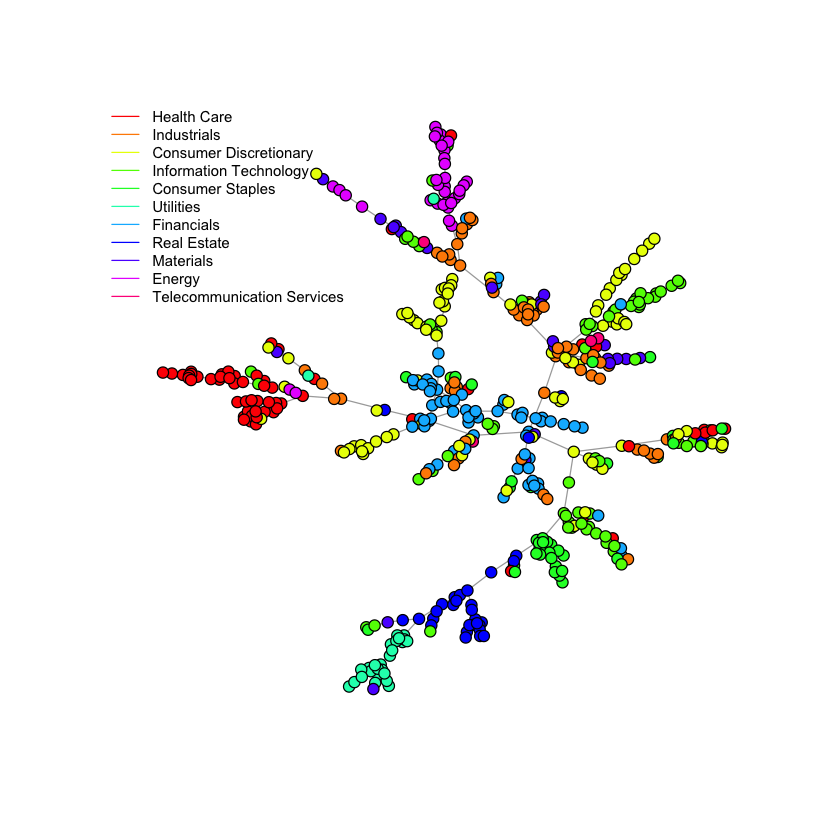

In [446]:
pal_l <- c(rainbow(n = length(unique(sector$Sector))))
sec_list = c(unique(sector$Sector))
pal <- c('Health Care' = '#FF0000FF', 'Industrials' = '#FF8B00FF', 'Consumer Discretionary'='#E8FF00FF', 'Information Technology'= '#5DFF00FF', 'Consumer Staples' = '#00FF2EFF', 'Utilities' = '#00FFB9FF', 'Financials' = '#00B9FFFF', 'Real Estate' = '#002EFFFF', 'Materials' = '#5D00FFFF', 'Energy' = '#E800FFFF',  'Telecommunication Services' = '#FF008BFF')


plot(g2_mst,vertex.size = 4, vertex.color = pal[sector$Sector[V(g2_mst)]],  vertex.label = NA)
# legend('topright', legend=sec_list, col=pal_l,bty='n', cex=.75, lty=1) # pch=1, inset = 0.7)
legend('topleft', legend=sec_list, col=pal_l, bty='n', cex=0.75, lty=1)

